In [5]:
"""LSA transforms the bag-of-words feature space to a new feature-space (with ortho-normal set of basis vectors) 
where each dimension represents a latent concept (represented as a linear combination of words in the original dimension).
As with PCA, a few top eigenvectors generally capture most of the variance in the transformed feature space and the other
eigenvectors mainly represent the noise in the dataset, hence, the top eigenvectors in the LSA featurespace can be thought
of to be likely to capture most of the concepts defined by the words in the original space. Hence, reduction in dimension
in the transofrmed LSA feature space is likely to be much more effective than in the original BOW tf-idf feature space 
(which simply chops of the less frequent / important words), thereby leading to better quality data after the dimensionality
reduction and likely to improve the quality of the clusters."""

In [90]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import scipy.sparse as sp
from mpl_toolkits.mplot3d import Axes3D

## SMALL EXAMPLE

In [75]:
X1 = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X1)  
TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7, random_state=42, tol=0.0)
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  
print(svd.singular_values_)  

[0.06063774 0.05842867]
0.11906641032058804
[2.58417984 2.52453713]


In [53]:
X1.nonzero()

(array([ 0,  2,  2,  3,  3,  6,  7,  9, 10, 11, 12, 13, 13, 16, 17, 17, 17,
        17, 21, 23, 23, 23, 24, 24, 25, 25, 25, 26, 27, 28, 28, 28, 30, 30,
        31, 33, 35, 37, 41, 41, 41, 41, 42, 44, 46, 47, 48, 50, 50, 51, 51,
        52, 52, 53, 54, 55, 55, 56, 57, 57, 57, 58, 58, 59, 60, 61, 63, 65,
        65, 66, 66, 68, 69, 69, 70, 71, 71, 71, 74, 75, 76, 77, 77, 78, 79,
        80, 82, 83, 84, 85, 85, 85, 85, 86, 87, 87, 89, 90, 91, 91, 94, 94,
        95, 95, 96, 96, 96, 97, 99]),
 array([92, 10, 60, 15, 94, 31, 67, 16, 23, 97, 10,  9, 46, 16, 10, 28, 83,
        89, 47,  5, 55, 97, 50, 74,  3, 61, 77, 84,  0, 34, 36, 45,  0, 82,
        11, 63, 99,  5, 11, 54, 57, 65, 28,  1, 35, 42, 19, 27, 44, 26, 40,
        13, 22, 80, 79, 10, 62, 11,  6, 77, 85, 55, 82, 38, 28, 31, 21, 15,
        89, 93, 98, 39, 24, 67,  7, 26, 86, 97, 78, 14, 86, 47, 56, 72, 56,
         1, 17, 38, 74,  9, 42, 61, 63, 74, 26, 28, 96, 39,  5, 53,  3, 18,
        73, 98, 42, 80, 97, 20, 89]))

In [54]:
"""print type(X)
print X
print X.getnnz()
print X.get_shape()
print type(svd.transform(X))
print len(svd.transform(X))
print svd.transform(X)
print type(svd)
print svd.get_params()
print svd.components_"""

'print type(X)\nprint X\nprint X.getnnz()\nprint X.get_shape()\nprint type(svd.transform(X))\nprint len(svd.transform(X))\nprint svd.transform(X)\nprint type(svd)\nprint svd.get_params()\nprint svd.components_'

In [57]:
a = svd.transform(X1)

In [64]:
x = [ a[i][0] for i in range(len(a))]
y = [ a[i][1] for i in range(len(a))]

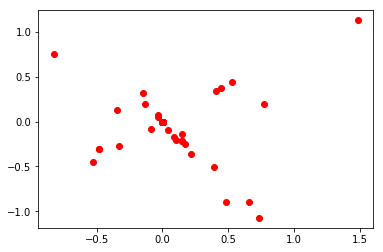

In [70]:
plt.plot(x,y, 'ro')
plt.show()

## Sparse Matrix 2 components --> 2D 


In [77]:
X2 = sp.load_npz('sparse_matrix.npz')

In [78]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X2)  
TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7, random_state=42, tol=0.0)
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  
print(svd.singular_values_) 

[0.06397792 0.02765057]
0.09162848496839948
[429.14949477 281.54995759]


In [84]:
print len(svd.transform(X2))
print type(X2)
#print X2
print X2.getnnz()
print X2.get_shape()
print type(svd.transform(X2))
print len(svd.transform(X2))
print np.count_nonzero(svd.transform(X2))
print type(svd)
print svd.get_params()
#print svd.components_

690000
<class 'scipy.sparse.csr.csr_matrix'>
2319680
(690000, 690000)
<type 'numpy.ndarray'>
690000
31296
<class 'sklearn.decomposition.truncated_svd.TruncatedSVD'>
{'tol': 0.0, 'n_iter': 7, 'random_state': 42, 'n_components': 2, 'algorithm': 'randomized'}


In [85]:
a = svd.transform(X2)
x = [ a[i][0] for i in range(len(a))]
y = [ a[i][1] for i in range(len(a))]

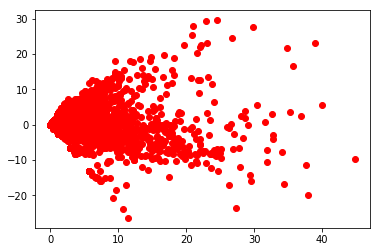

In [86]:
plt.plot(x,y, 'ro')
plt.show()

## Sparse Matrix 3 components --> 3D 

In [87]:
X3 = sp.load_npz('sparse_matrix.npz')
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
svd.fit(X3)  
TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7, random_state=42, tol=0.0)
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  
print(svd.singular_values_) 
print len(svd.transform(X3))
print type(X3)
#print X2
print X3.getnnz()
print X3.get_shape()
print type(svd.transform(X3))
print len(svd.transform(X3))
print np.count_nonzero(svd.transform(X3))
print type(svd)
print svd.get_params()
#print svd.components_

[0.06397791 0.02765152 0.02627782]
0.11790725919321292
[429.14949486 281.55455144 274.5894956 ]
690000
<class 'scipy.sparse.csr.csr_matrix'>
2319680
(690000, 690000)
<type 'numpy.ndarray'>
690000
46944
<class 'sklearn.decomposition.truncated_svd.TruncatedSVD'>
{'tol': 0.0, 'n_iter': 7, 'random_state': 42, 'n_components': 3, 'algorithm': 'randomized'}


In [89]:
a = svd.transform(X3)
x = [ a[i][0] for i in range(len(a))]
y = [ a[i][1] for i in range(len(a))]
z = [ a[i][2] for i in range(len(a))]

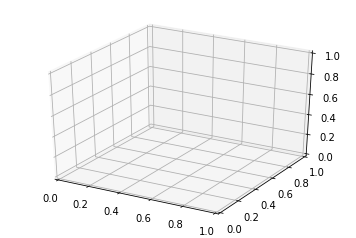

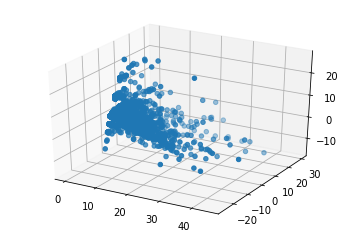

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 'ro')
plt.show()

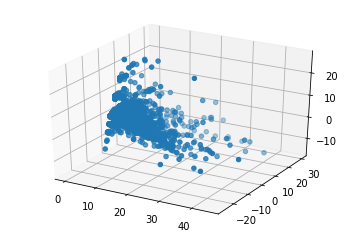

In [94]:
X = sp.load_npz('sparse_matrix.npz')
svd = TruncatedSVD(n_components=15, n_iter=7, random_state=42)
svd.fit(X)  
TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7, random_state=42, tol=0.0)
a = svd.transform(X)
x = [ a[i][0] for i in range(len(a))]
y = [ a[i][1] for i in range(len(a))]
z = [ a[i][2] for i in range(len(a))]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 'ro')
plt.show()

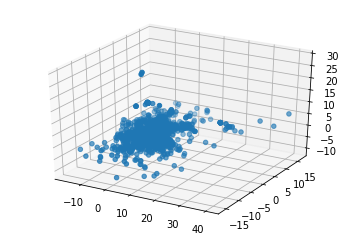

In [95]:
a = svd.transform(X)
x = [ a[i][3] for i in range(len(a))]
y = [ a[i][4] for i in range(len(a))]
z = [ a[i][5] for i in range(len(a))]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 'ro')
plt.show()

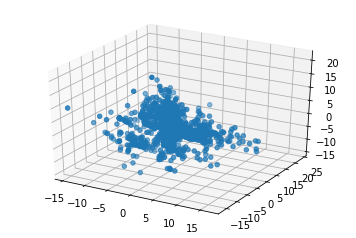

In [96]:
a = svd.transform(X)
x = [ a[i][6] for i in range(len(a))]
y = [ a[i][7] for i in range(len(a))]
z = [ a[i][8] for i in range(len(a))]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 'ro')
plt.show()

In [ ]:
fhfnfh